In [1]:
import sys
sys.path.append('../')

from helpers import helper
import config

import cv2
import numpy as np
from tqdm import tqdm
import pandas as pd
from matplotlib import pyplot as plt

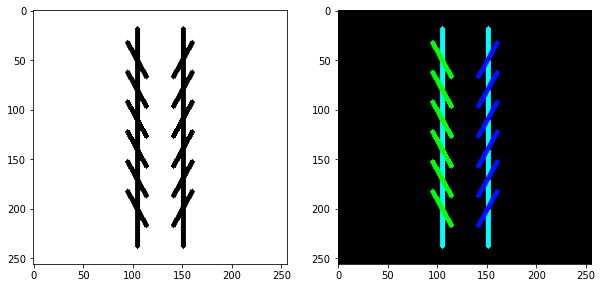

In [23]:
def draw_slash(image, label, center, length, slash_degree, thickness=2):
    # Draw line on image
    radian = helper.convertDegreeToRadian(slash_degree)
    x1 = int(center[0] + length * np.cos(radian))
    y1 = int(center[1] + length * np.sin(radian))
    y2 = int(center[1] - length * np.sin(radian))
    x2 = int(center[0] - length * np.cos(radian))

    image, label = helper.drawLine(image, label, (x1, y1), (x2, y2), thickness)
    return image, label

def draw_illusion(image, label, slash_degree, thickness=2, interval=30):
    draw_slash(image, label, (config.LEFT_POS, 128), 110, 90, thickness)
    draw_slash(image, label, (config.RIGHT_POS, 128), 110, 90, thickness)

    for i in range(config.slash_position["start"], config.slash_position["end"], interval):
        draw_slash(image, label, (config.LEFT_POS, i), 20, slash_degree, thickness)
        draw_slash(image, label, (config.RIGHT_POS, i), 20, 180-slash_degree, thickness)


image = np.ones((256, 256, 3), np.uint8) * 255
label = np.zeros((256, 256, 3), np.uint8)
draw_illusion(image, label, slash_degree=60.5, thickness=4, interval=30)
label = cv2.cvtColor(label, cv2.COLOR_HSV2RGB)
figure, axis = plt.subplots(1, 2, figsize=(10, 10))
axis[0].imshow(image)
axis[1].imshow(label)

In [17]:
# generate experiment data
df = pd.DataFrame(columns=['image_path', 'label_path'])
image_path = '../../datasets/experiment/images/'
label_path = '../../datasets/experiment/labels/'

interval = 30

for slash_degree in np.arange(0, 80.0, 0.5):
    for thickness in range(1, 5):
        img = np.ones((256, 256, 3), np.uint8) * 255
        label = np.zeros((256, 256, 3), np.uint8)
        draw_illusion(img, label, slash_degree, thickness, interval)
        label = cv2.cvtColor(label, cv2.COLOR_HSV2BGR)
        cv2.imwrite(image_path + 'image_{}_{}_{}.png'.format(slash_degree, thickness, interval), img)
        cv2.imwrite(label_path + 'label_{}_{}_{}.png'.format(slash_degree, thickness, interval), label)
        new_row = {'image_path': image_path+'image_{}_{}_{}.png'.format(slash_degree, thickness, interval), 'label_path': label_path+'label_{}_{}_{}.png'.format(angle, thickness, interval)}
        df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

        
df.to_csv('../../datasets/experiment.csv', index=False)